In [106]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os


In [128]:
def generate_paths(Mg_dir, compounds, condition, window, replicas,ftype):
    paths = []
    path_1 = '/home/arasouli/repos/alchemical/'
    if ftype == 'prmtop':
        path_3 = '1-sys_prep/box.prmtop'
    elif ftype == 'dcd':
        path_3 = '2-sim_run/equ_2/equ.0.dcd'

    for compound in compounds:
        for i in range(1, replicas + 1):
            path = os.path.join(path_1, Mg_dir, compound, condition, window, f"{i}-rep{i}", path_3)
            paths.append(path)
    return paths


In [129]:
# List of filenames of the first set of DCD files for TIP3P
compounds = ['2-theophylline', '3-1_methylxanthine', '4-3_methylxanthine', '5-hypoxanthine', '6-xanthine', '7-caffeine']

prmtop_1 = generate_paths('rna_small_molecule_FE', compounds, '3-55NaCl_Mg', '1-40winCmplx_30winLig',3,'prmtop')
prmtop_2 = generate_paths('rna_small_molecule_FE', compounds, '3-55NaCl_Mg','6-opc_40winCmplx_30winLig',3,'prmtop')
prmtop_3 = generate_paths('rna_small_molecule_FE', compounds, '10-55KCl_Mg', '1-40winCmplx_30winLig',3,'prmtop')
prmtop_4 = generate_paths('3_mg_rna_small_molecule_FE', compounds, '1-55NaCl_3Mg', '1-40winCmplx_30winLig',3,'prmtop')

dcds_1 = generate_paths('rna_small_molecule_FE', compounds,'3-55NaCl_Mg', '1-40winCmplx_30winLig',3,'dcd')
dcds_2 = generate_paths('rna_small_molecule_FE', compounds, '3-55NaCl_Mg', '6-opc_40winCmplx_30winLig',3,'dcd')
dcds_3 = generate_paths('rna_small_molecule_FE', compounds, '10-55KCl_Mg', '1-40winCmplx_30winLig',3,'dcd')
dcds_4 = generate_paths('3_mg_rna_small_molecule_FE', compounds, '1-55NaCl_3Mg', '1-40winCmplx_30winLig',3,'dcd')


# Load all the DCD files from the first set into a list of universes
universes1 = [mda.Universe(prmtop, filename) for filename, prmtop in zip(dcds_1,prmtop_1)]

# Load all the DCD files from the second set into a list of universes
universes2 = [mda.Universe(prmtop, filename) for filename, prmtop in zip(dcds_2,prmtop_2)]

# Load all the DCD files from the second set into a list of universes
universes3 = [mda.Universe(prmtop, filename) for filename, prmtop in zip(dcds_3,prmtop_3)]

# Load all the DCD files from the second set into a list of universes
universes4 = [mda.Universe(prmtop, filename) for filename, prmtop in zip(dcds_4,prmtop_4)]

# Combine all the frames from all the universes from the first set into one list
frames1 = []
for universe in universes1:
    for ts in universe.trajectory[::200]:
        rna = universe.select_atoms("nucleicbackbone")
        frames1.append(rna.positions)
        
    
# Combine all the frames from all the universes from the second set into one list
frames2 = []
for universe in universes2:
    for ts in universe.trajectory[::200]:
        rna = universe.select_atoms("nucleicbackbone")
        frames2.append(rna.positions)
        
# Combine all the frames from all the universes from the second set into one list
frames3 = []
for universe in universes3:
    for ts in universe.trajectory[::200]:
        rna = universe.select_atoms("nucleicbackbone")
        frames3.append(rna.positions)

# Combine all the frames from all the universes from the second set into one list
frames4 = []
for universe in universes4:
    for ts in universe.trajectory[::200]:
        rna = universe.select_atoms("nucleicbackbone")
        frames4.append(rna.positions)
        
# Combine all the frames from both sets into one list
all_frames = frames1 + frames2 + frames3 + frames4

# Combine all the positions from all the frames into one array
all_positions = np.concatenate(all_frames)


/opt/install/conda/lib/python3.10/site-packages/MDAnalysis/topology/TOPParser.py:295: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)


In [130]:
# Perform PCA on the combined positions
pca = PCA(n_components=2)
pca.fit(all_positions)

# Project all the positions onto the first two principal components
pc_projections = pca.transform(all_positions)

# Divide the projections into separate arrays for each set
set1_projections = pc_projections[:len(frames1)*len(frames1[0])]
set2_projections = pc_projections[len(frames1)*len(frames1[0]):len(frames1)*len(frames1[0])+len(frames2)*len(frames2[0])]
set3_projections = pc_projections[len(frames1)*len(frames1[0])+len(frames2)*len(frames2[0]):len(frames1)*len(frames1[0])+len(frames2)*len(frames2[0])+len(frames3)*len(frames3[0])]
set4_projections = pc_projections[len(frames1)*len(frames1[0])+len(frames2)*len(frames2[0])+len(frames3)*len(frames3[0]):]



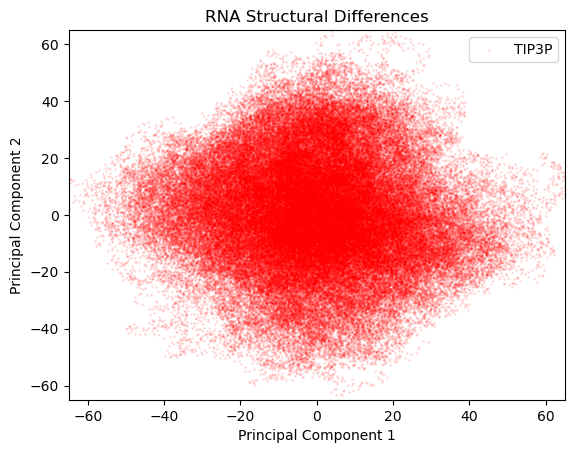

In [121]:
# Plot the projections in the PCA space
plt.scatter(set1_projections[:, 0], set1_projections[:, 1], alpha=.1, s=1, color='red', label='TIP3P')
# plt.scatter(set2_projections[:, 0], set2_projections[:, 1], alpha=.1, s=1, color='blue', label='OPC')
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim(-65,65)
plt.ylim(-65,65)
plt.title("RNA Structural Differences")
plt.savefig(f"./figs/PCA_TIP3P.pdf", bbox_inches='tight')
plt.show()

/opt/install/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


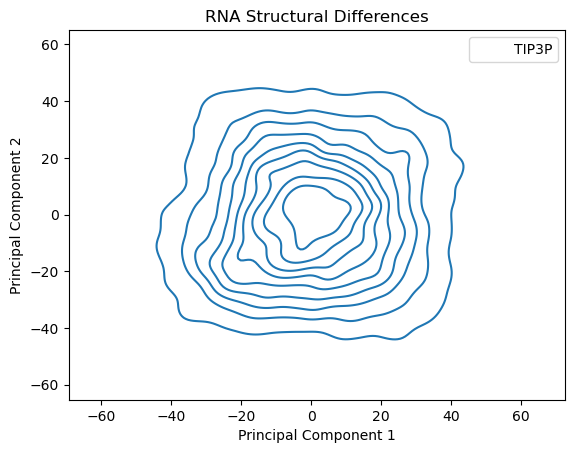

In [91]:
import seaborn as sns
# Plot the projections in the PCA space
sns.kdeplot(set1_projections[:, 0], set1_projections[:, 1], label='TIP3P')
# plt.scatter(set2_projections[:, 0], set2_projections[:, 1], alpha=.1, s=1, color='blue', label='OPC')
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.title("RNA Structural Differences")
# plt.savefig(f"./figs/PCA_TIP3P.pdf", bbox_inches='tight')
plt.show()

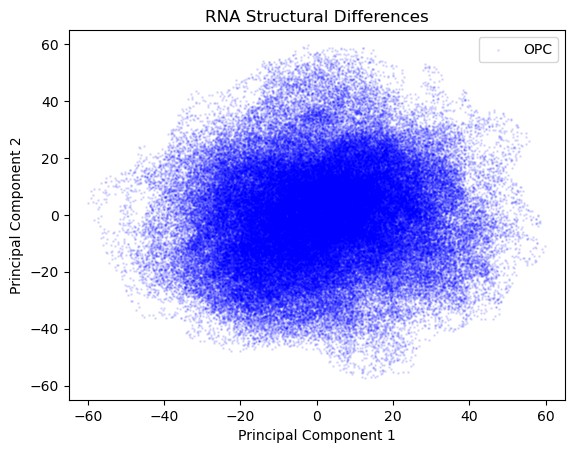

In [122]:
# Plot the projections in the PCA space
plt.scatter(set2_projections[:, 0], set2_projections[:, 1], alpha=.1, s=1, color='blue', label='OPC')
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim(-65,65)
plt.ylim(-65,65)
plt.title("RNA Structural Differences")
plt.savefig(f"./figs/PCA_OPC.pdf", bbox_inches='tight')
plt.show()

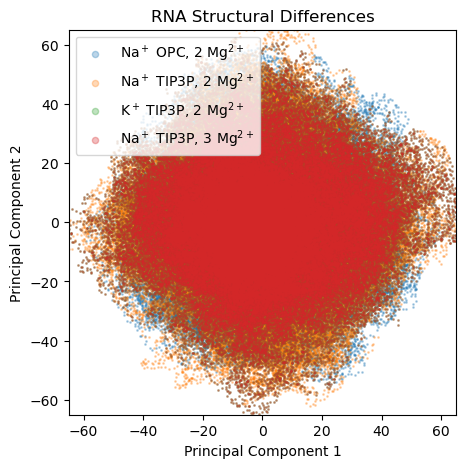

In [ ]:
# Plot the projections in the PCA space
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
plt.scatter(set2_projections[:, 0], set2_projections[:, 1], alpha=.3, s=1, label='Na$^+$ OPC, 2 Mg$^{2+}$')
plt.scatter(set1_projections[:, 0], set1_projections[:, 1], alpha=.3, s=1, label='Na$^+$ TIP3P, 2 Mg$^{2+}$')
plt.scatter(set3_projections[:, 0], set3_projections[:, 1], alpha=.3, s=1, label='K$^+$ TIP3P, 2 Mg$^{2+}$')
plt.scatter(set3_projections[:, 0], set3_projections[:, 1], alpha=.3, s=1, label='Na$^+$ TIP3P, 3 Mg$^{2+}$')

lgnd = plt.legend(loc='upper left', numpoints=1)
#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
lgnd.legendHandles[3]._sizes = [20]
# axs.legend(handlelength=2, handletextpad=0,
#                               labelcolor='linecolor',fontsize=20, 
#                               loc='upper left')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim(-65,65)
plt.ylim(-65,65)
plt.title("RNA Structural Differences")
plt.savefig(f"./figs/PCA_TIP3P_OPC.png", bbox_inches='tight')
plt.show()


/opt/install/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/install/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


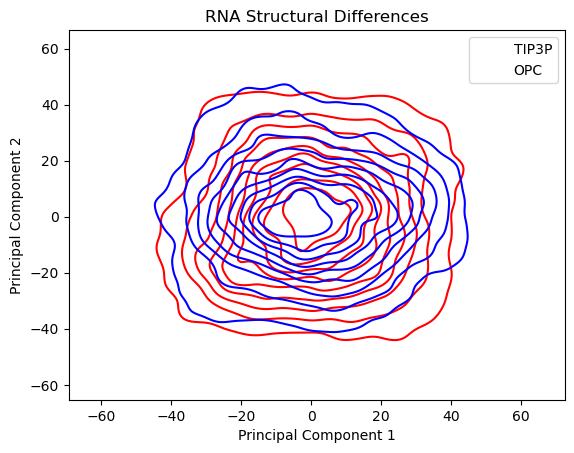

In [93]:
# Plot the projections in the PCA space
sns.kdeplot(set1_projections[:, 0], set1_projections[:, 1], color='red',label='Na$^+$ TIP3P')
sns.kdeplot(set2_projections[:, 0], set2_projections[:, 1], color='blue',label='Na$^+$ OPC')
sns.kdeplot(set3_projections[:, 0], set3_projections[:, 1], color='green',label='K$^+$ TIP3P')

plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# plt.xlim(-65,65)
# plt.ylim(-65,65)
plt.title("RNA Structural Differences")
# plt.savefig(f"./figs/PCA_TIP3P_OPC.pdf", bbox_inches='tight')
plt.show()


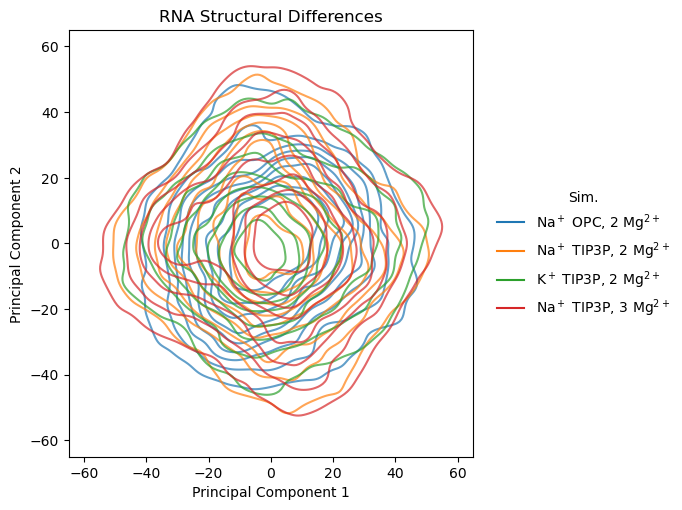

In [147]:
import pandas as pd
# from matplotlib.axes import Axes

df = pd.DataFrame()

for name, data in zip(['Na$^+$ OPC, 2 Mg$^{2+}$', 'Na$^+$ TIP3P, 2 Mg$^{2+}$', 'K$^+$ TIP3P, 2 Mg$^{2+}$', 'Na$^+$ TIP3P, 3 Mg$^{2+}$'], [set2_projections, set1_projections, set3_projections, set4_projections]):
    temp = pd.DataFrame({'PC1': data[:,0], 'PC2': data[:,1]})
    temp['Sim.'] = name
    df = pd.concat([df, temp]).reset_index(drop=True)
    

sns.displot(data=df, x='PC1', y='PC2', hue='Sim.', alpha=.7, kind='kde')

for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(True)
    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim(-65,65)
plt.ylim(-65,65)
plt.title("RNA Structural Differences")
plt.savefig(f"./figs/PCA_TIP3P_OPC_KDE_3.pdf", bbox_inches='tight')
plt.show()